In [217]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go

In [218]:
dirty = pd.read_csv("users_kmeans.csv")
dirty
x = []
y = []
labels = []
for i in range(0, len(dirty.columns), 2):
    x.extend(dirty.iloc[:,i].dropna().values)
    y.extend(dirty.iloc[:,i+1].dropna().values)
    labels.extend([i//2 for _ in range(len(dirty.iloc[:,i].dropna().values))])
x = np.array(x)
y = np.array(y)
labels = np.array(labels)

X = np.array([[i, j] for i,j in zip(x,y)])
X

array([[-0.33824729, -0.31097575],
       [ 0.19958   ,  0.43395185],
       [ 1.5833037 , -1.16524934],
       ...,
       [-2.81309049, -0.60312397],
       [-2.88048197, -0.6916436 ],
       [-1.55465144, -1.07478861]])

In [222]:
x.reshape(-1,1).shape

(593, 1)

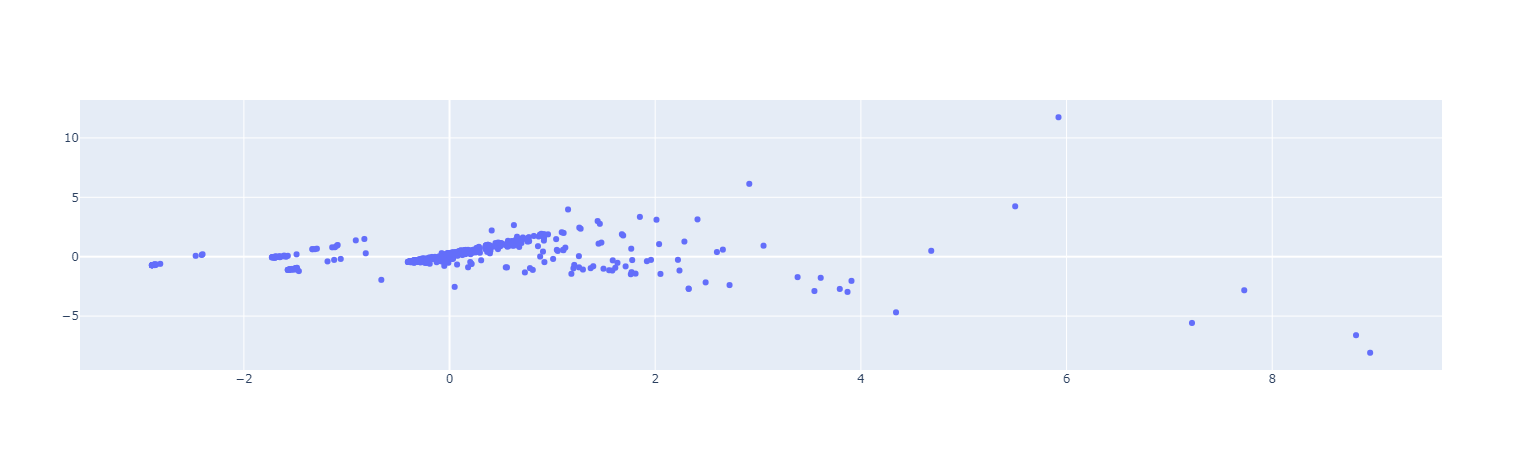

In [223]:
fig = go.Figure(go.Scatter(x=x, y=y, mode="markers"))
fig.show()

In [227]:
kmeans = KMeans(n_clusters=4, random_state=0)
vals = kmeans.fit_predict(X)
vals

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
def SetColor(x):
    if x == 0:
        return "blue"
    if x == 1:
        return "red"
    if x == 2:
        return "green"
    if x == 3:
        return "yellow"

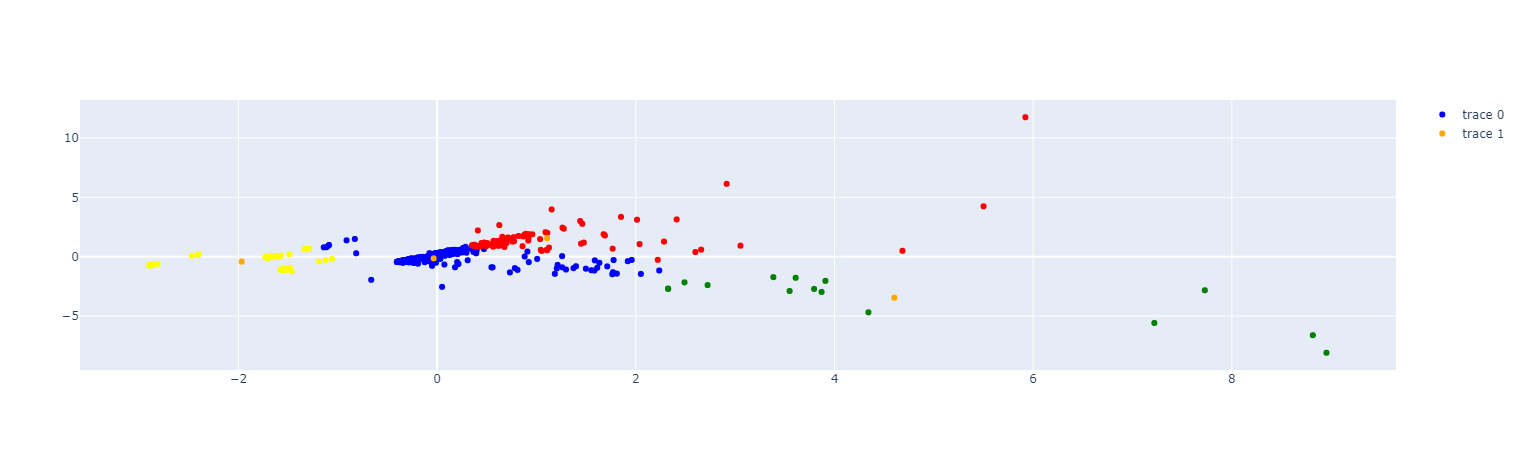

In [234]:
fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='markers', marker = dict(color=list(map(SetColor, vals)))),
                         go.Scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], mode='markers', marker = dict(color=["orange"]*4) )])
fig.show()

In [245]:
kmeans.predict_proba([[2,0]])

AttributeError: 'KMeans' object has no attribute 'predict_proba'

In [232]:
kmeans.cluster_centers_

array([[-0.03506082, -0.14248831],
       [ 1.10717371,  1.56712914],
       [ 4.60243082, -3.45692858],
       [-1.96815768, -0.41290624]])

In [246]:
# KNN
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :3]
y = iris.target
# iris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

array([[6.1, 2.6, 5.6],
       [6.1, 2.8, 4.7],
       [6.1, 2.9, 4.7],
       [4.8, 3.4, 1.6],
       [7.7, 2.8, 6.7],
       [5.8, 2.7, 5.1],
       [5.1, 3.5, 1.4],
       [5.7, 2.8, 4.1],
       [5.8, 2.7, 5.1],
       [5.1, 3.4, 1.5],
       [6.7, 3. , 5. ],
       [5.8, 2.8, 5.1],
       [6.4, 3.2, 5.3],
       [5.6, 2.9, 3.6],
       [5.6, 2.7, 4.2],
       [6.5, 3. , 5.5],
       [6.4, 2.8, 5.6],
       [6.5, 2.8, 4.6],
       [6.5, 3. , 5.8],
       [7.3, 2.9, 6.3],
       [5. , 3. , 1.6],
       [4.7, 3.2, 1.6],
       [6.3, 3.3, 4.7],
       [6.4, 2.7, 5.3],
       [6.1, 3. , 4.9],
       [5.1, 3.8, 1.9],
       [4.4, 3.2, 1.3],
       [7.9, 3.8, 6.4],
       [5.4, 3.4, 1.5],
       [6. , 2.2, 5. ],
       [5.1, 3.8, 1.5],
       [6.9, 3.2, 5.7],
       [6. , 2.7, 5.1],
       [6.3, 2.8, 5.1],
       [6.8, 3.2, 5.9],
       [5.1, 3.5, 1.4],
       [6.7, 2.5, 5.8],
       [5.6, 2.8, 4.9],
       [5.4, 3.9, 1.3],
       [6. , 2.9, 4.5],
       [5.1, 3.3, 1.7],
       [6.2, 2.8

In [243]:
knn = KNeighborsClassifier(n_neighbors=10, weights="distance").fit(X_train,y_train)

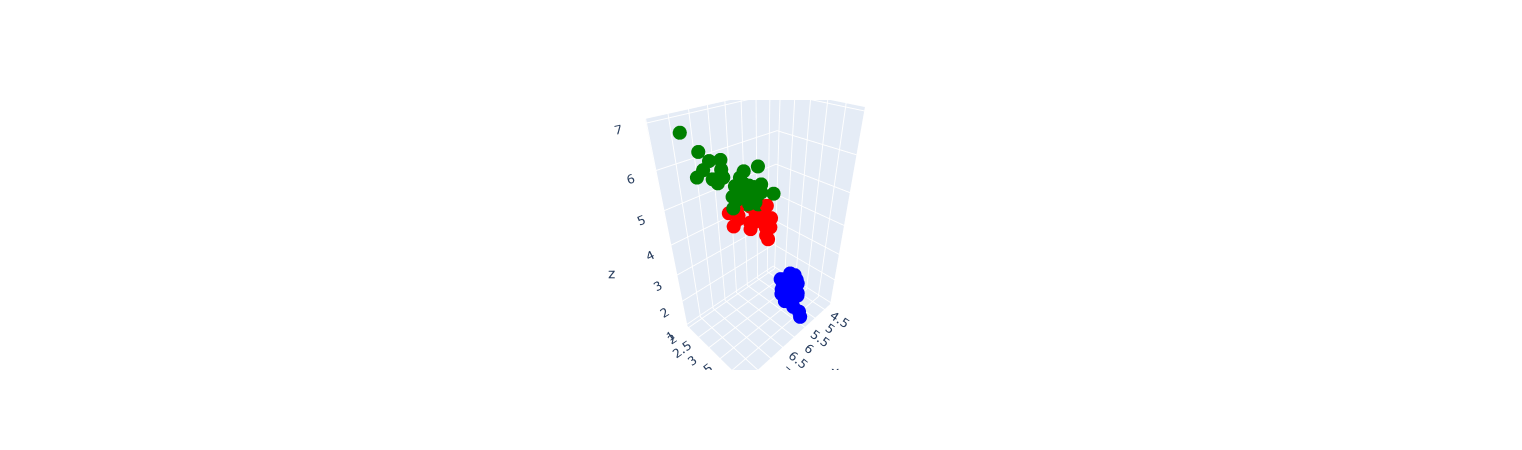

In [238]:
fig = go.Figure(go.Scatter3d(x=X_train[:,0], y=X_train[:,1], z=X_train[:,2], mode="markers", marker = dict(color=list(map(SetColor, y_train))) ))
fig.show()

In [252]:
def SetColor2(x):
    if x == 0:
        return "#1f77b4"
    if x == 1:
        return "#ff7f0e"
    if x == 2:
        return "#bcbd22"

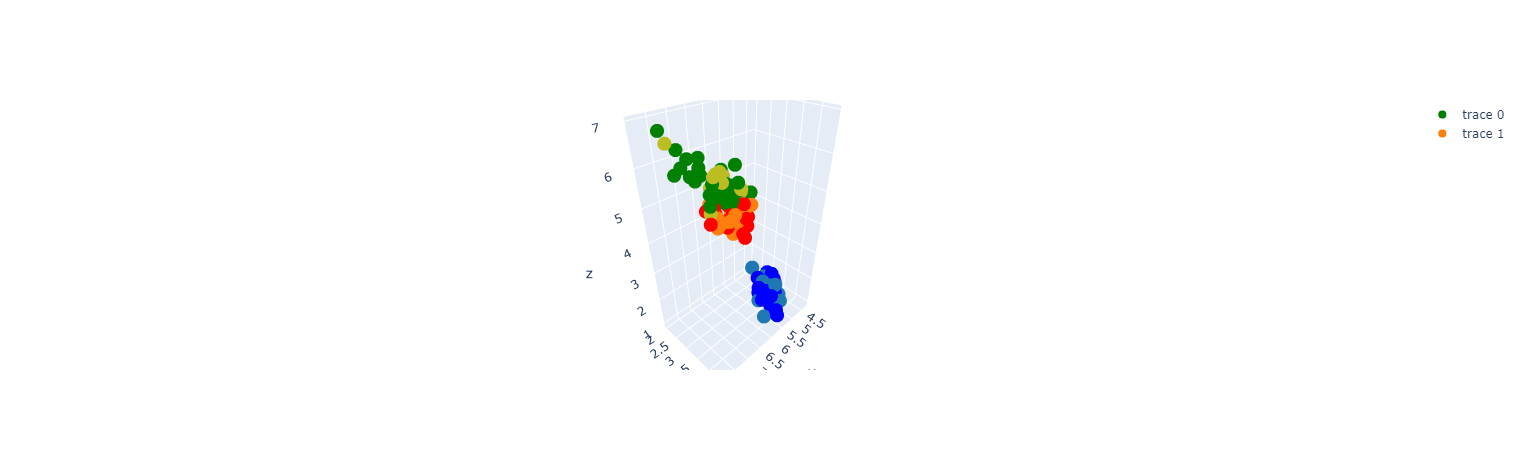

In [240]:
fig = go.Figure(data=[go.Scatter3d(x=X_train[:,0], y=X_train[:,1], z=X_train[:,2], mode="markers", marker = dict(color=list(map(SetColor, y_train))) ),
                      go.Scatter3d(x=X_test[:,0], y=X_test[:,1], z=X_test[:,2], mode="markers", marker = dict(color=list(map(SetColor2, knn.predict(X_test)))) )])
fig.show()

In [244]:
metrics.accuracy_score(y_test, knn.predict(X_test))

0.9777777777777777

In [247]:
knn.predict_proba([[6,2.5,5]])

array([[0.        , 0.31327127, 0.68672873]])

In [248]:
knn.predict([[6,2.5,5]])

array([2])

In [256]:
kmeans = KMeans(n_clusters=3, random_state=0)
vals = kmeans.fit_predict(X_train)
kmeans.cluster_centers_

array([[5.80263158, 2.79210526, 4.40526316],
       [4.99411765, 3.42352941, 1.49411765],
       [6.78484848, 3.03030303, 5.63030303]])

In [257]:
def SetColor3(x):
    if x == 0:
        return "#ff7f0e"
    if x == 1:
        return "#1f77b4"
    if x == 2:
        return "#bcbd22"

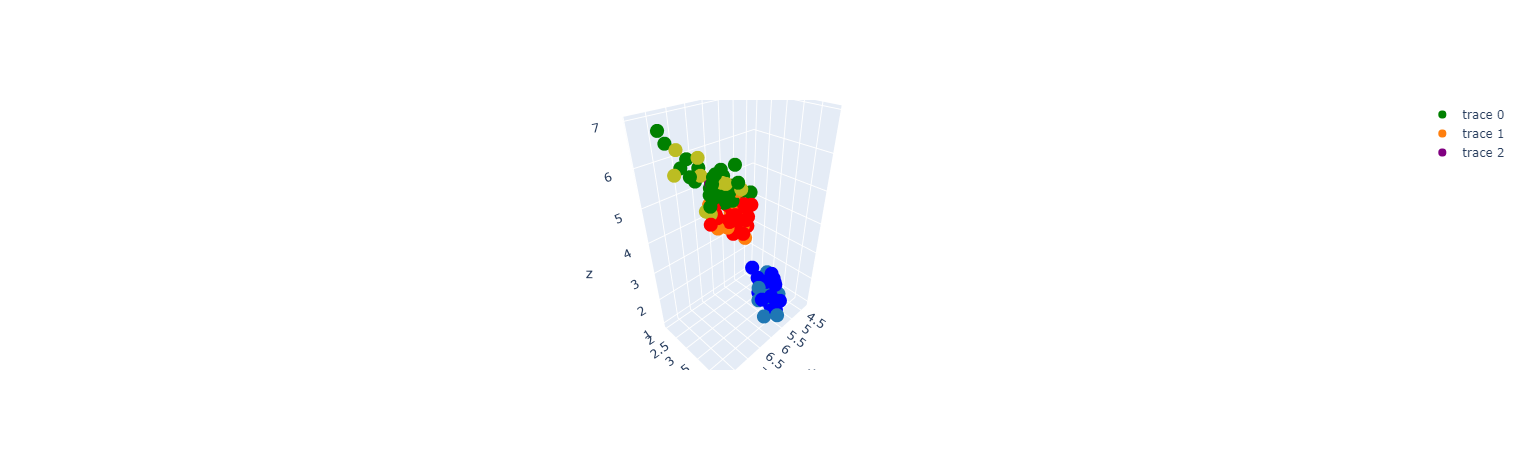

In [260]:
fig = go.Figure(data=[go.Scatter3d(x=X_train[:,0], y=X_train[:,1], z=X_train[:,2], mode="markers", marker = dict(color=list(map(SetColor, y_train))) ),
                      go.Scatter3d(x=X_test[:,0], y=X_test[:,1], z=X_test[:,2], mode="markers", marker = dict(color=list(map(SetColor3, kmeans.predict(X_test)))) ),
                     go.Scatter3d(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], z=kmeans.cluster_centers_[:,2], mode='markers', marker = dict(color=["purple"]*4) )])
fig.show()

In [262]:
kmeans.score(X_test)

-29.03061864555566